<a href="https://colab.research.google.com/github/TechWhizGenius/Teja_INFO5731_Fall2024/blob/main/Mandaloju_Teja_Exercise_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


In [ ]:
'''

import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# Base URL
base_url = "http://books.toscrape.com/catalogue/page-{}.html"

# Initialize lists to store titles and descriptions
book_titles = []
book_descriptions = []

# Total number of books to scrape
total_books_to_scrape = 1000
books_per_page = 20  # Number of books per page
total_pages = total_books_to_scrape // books_per_page + 1  # Calculate total pages needed

# Iterate through the pages
for page in range(1, total_pages + 1):
    # Construct the URL for the current page
    response = requests.get(base_url.format(page))

    if response.status_code == 200:
        print(f"Successfully fetched page {page}!")
    else:
        print(f"Failed to fetch page {page}. Status code: {response.status_code}")
        break

    # Parse the page
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find all book titles and links to individual book pages
    books = soup.find_all('article', class_='product_pod')

    # Visit individual book pages to extract titles and descriptions
    for book in books:
        title = book.h3.a['title']
        book_url = base_url.rsplit('/', 1)[0] + '/' + book.h3.a['href']  # Correctly form the book URL
        book_titles.append(title)

        # Fetch individual book page to get the description
        book_response = requests.get(book_url)
        book_soup = BeautifulSoup(book_response.content, 'html.parser')

        # Extract the description from the book page
        description = book_soup.find('meta', attrs={"name": "description"})['content'].strip()
        book_descriptions.append(description)

        # Optional delay to avoid hitting the server too quickly
        time.sleep(1)

    # Break if we have collected enough books
    if len(book_titles) >= total_books_to_scrape:
        break

# Create a DataFrame from the titles and descriptions
df = pd.DataFrame({
    'Title': book_titles[:total_books_to_scrape],  # Limit to the required number of books
    'Description': book_descriptions[:total_books_to_scrape]  # Limit to the required number of descriptions
})

print(df.head())  # Display the first few entries
print(f"Total books scraped: {df.shape[0]}")


# Save the DataFrame to a CSV file
df.to_csv('books_to_scrape.csv', index=False)

print("DataFrame has been saved as 'books_to_scrape.csv'.")

from google.colab import files
files.download('books_to_scrape.csv')

'''

I am using above code to download the csv file - This is my previous assignmnet. This file is uploaded in my drive and then read

In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the CSV file
# Make sure to adjust the path according to your directory structure in Google Drive
file_path = '/content/drive/My Drive/INFO 5731 - Computational Methods/Week 7/books_to_scrape.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                                   Title  \
0                   A Light in the Attic   
1                     Tipping the Velvet   
2                             Soumission   
3                          Sharp Objects   
4  Sapiens: A Brief History of Humankind   

                                         Description  
0  It's hard to imagine a world without A Light i...  
1  "Erotic and absorbing...Written with starling ...  
2  Dans une France assez proche de la nôtre, un h...  
3  WICKED above her hipbone, GIRL across her hear...  
4  From a renowned historian comes a groundbreaki...  


In [ ]:
'''
!pip install lda2vec
!pip install tensorflow
!pip install keras
!pip install git+https://github.com/bmabey/pyLDAvis.git@master        #egg=pyLDAvis
'''

'\n\n!pip install lda2vec\n!pip install tensorflow\n!pip install keras\n\n!pip install git+https://github.com/bmabey/pyLDAvis.git@master        #egg=pyLDAvis\n\n\n'

## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [ ]:
# Importing libraries
import nltk; nltk.download('stopwords')

# downloading spacy model
!python3 -m spacy download en_core_web_sm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 51.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
!pip install pyLDAvis

In [ ]:
!pip install gensim==4.1.2


In [ ]:
!pip install scipy==1.10.1  # Downgrade SciPy to avoid gensim import problems

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 32.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


In [ ]:
#!pip install -U spacy thinc

In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [ ]:
# dataset

df.size

2000

In [ ]:
import re
import gensim
from pprint import pprint

# Convert to list
data = df.Description.values.tolist()

# Remove Emails (uncomment if needed)
# data = [re.sub('\S*@\S*\s?', '', str(sent)) for sent in data]

# Remove new line characters and ensure all entries are strings
data = [re.sub('\s+', ' ', str(sent)) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

# Tokenize words and clean up text
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuation

# Convert sentences to words
data_words = list(sent_to_words(data))

print(data_words[:1])


['Its hard to imagine a world without A Light in the Attic. This now-classic '
 'collection of poetry and drawings from Shel Silverstein celebrates its 20th '
 'anniversary with this special edition. Silversteins humorous and creative '
 'verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids '
 'sit still and read these rhythmic words and laugh and smile and love th Its '
 'hard to imagine a world without A Light in the Attic. This now-classic '
 'collection of poetry and drawings from Shel Silverstein celebrates its 20th '
 'anniversary with this special edition. Silversteins humorous and creative '
 'verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids '
 'sit still and read these rhythmic words and laugh and smile and love that '
 'Silverstein. Need proof of his genius? RockabyeRockabye baby, in the '
 'treetopDont you know a treetopIs no safe place to rock?And who put you up '
 'there,And your cradle, too?Baby, I think someone down her

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['its', 'hard', 'to', 'imagine', 'world', 'without', 'light', 'in', 'the', 'attic', 'this', 'now', 'classic', 'collection', 'of', 'poetry', 'and', 'drawings', 'from', 'shel', 'silverstein', 'celebrates', 'its', 'th_anniversary', 'with', 'this', 'special', 'edition', 'silversteins', 'humorous', 'and', 'creative', 'verse', 'can', 'amuse', 'the', 'dowdiest', 'of', 'readers', 'lemon', 'faced', 'adults', 'and', 'fidgety', 'kids', 'sit', 'still', 'and', 'read', 'these', 'rhythmic', 'words', 'and', 'laugh', 'and', 'smile', 'and', 'love', 'th', 'its', 'hard', 'to', 'imagine', 'world', 'without', 'light', 'in', 'the', 'attic', 'this', 'now', 'classic', 'collection', 'of', 'poetry', 'and', 'drawings', 'from', 'shel', 'silverstein', 'celebrates', 'its', 'th_anniversary', 'with', 'this', 'special', 'edition', 'silversteins', 'humorous', 'and', 'creative', 'verse', 'can', 'amuse', 'the', 'dowdiest', 'of', 'readers', 'lemon', 'faced', 'adults', 'and', 'fidgety', 'kids', 'sit', 'still', 'and', 'read'

In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['hard', 'imagine', 'world', 'light', 'attic', 'classic', 'collection', 'poetry', 'drawing', 'edition', 'silverstein', 'humorous', 'creative', 'verse', 'amuse', 'dowdy', 'reader', 'lemon', 'face', 'adult', 'kid', 'sit', 'still', 'read', 'rhythmic', 'word', 'laugh', 'smile', 'love', 'hard', 'imagine', 'world', 'light', 'attic', 'classic', 'collection', 'poetry', 'drawing', 'edition', 'silverstein', 'humorous', 'creative', 'verse', 'amuse', 'dowdy', 'reader', 'lemon', 'face', 'adult', 'kid', 'sit', 'still', 'read', 'rhythmic', 'word', 'laugh', 'smile', 'need', 'proof', 'genius', 'baby', 'know', 'safe', 'place', 'rock', 'put', 'cradle', 'baby', 'think', 'heresgot', 'never', 'sound', 'good']]


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 1), (7, 2), (8, 2), (9, 2), (10, 2), (11, 2), (12, 1), (13, 1), (14, 2), (15, 1), (16, 2), (17, 2), (18, 2), (19, 1), (20, 2), (21, 2), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 2), (28, 1), (29, 1), (30, 2), (31, 2), (32, 2), (33, 1), (34, 1), (35, 2), (36, 2), (37, 2), (38, 1), (39, 2), (40, 1), (41, 2), (42, 2), (43, 2)]]


In [ ]:
id2word[0]

'adult'

In [ ]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('adult', 2),
  ('amuse', 2),
  ('attic', 2),
  ('baby', 2),
  ('classic', 2),
  ('collection', 2),
  ('cradle', 1),
  ('creative', 2),
  ('dowdy', 2),
  ('drawing', 2),
  ('edition', 2),
  ('face', 2),
  ('genius', 1),
  ('good', 1),
  ('hard', 2),
  ('heresgot', 1),
  ('humorous', 2),
  ('imagine', 2),
  ('kid', 2),
  ('know', 1),
  ('laugh', 2),
  ('lemon', 2),
  ('light', 2),
  ('love', 1),
  ('need', 1),
  ('never', 1),
  ('place', 1),
  ('poetry', 2),
  ('proof', 1),
  ('put', 1),
  ('read', 2),
  ('reader', 2),
  ('rhythmic', 2),
  ('rock', 1),
  ('safe', 1),
  ('silverstein', 2),
  ('sit', 2),
  ('smile', 2),
  ('sound', 1),
  ('still', 2),
  ('think', 1),
  ('verse', 2),
  ('word', 2),
  ('world', 2)]]

In [ ]:
# Set a range for number of topics
min_topics = 2
max_topics = 20
step = 1
coherence_scores = []

# Loop through each K to find the optimal number of topics based on coherence
for k in range(min_topics, max_topics + 1, step):
    lda_model = gensim.models.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=k,
                                       random_state=100,
                                       update_every=1,
                                       chunksize=100,
                                       passes=10,
                                       alpha='auto')

    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_scores.append((k, coherence_lda))
    print(f'Coherence Score for {k} topics: {coherence_lda}')

# Find the optimal number of topics based on the highest coherence score
optimal_k = max(coherence_scores, key=lambda x: x[1])[0]
print(f'\nOptimal number of topics: {optimal_k}')

# Refit the model with the optimal K
lda_model = gensim.models.LdaModel(corpus=corpus,
                                   id2word=id2word,
                                   num_topics=optimal_k,
                                   random_state=100,
                                   update_every=1,
                                   chunksize=100,
                                   passes=10,
                                   alpha='auto')

# Print the topics for the optimal model
pprint(lda_model.print_topics())

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis


Coherence Score for 2 topics: 0.2875635224324077
Coherence Score for 3 topics: 0.29699174831821834
Coherence Score for 4 topics: 0.28758107854401593
Coherence Score for 5 topics: 0.3057576072343422
Coherence Score for 6 topics: 0.3266088123660306
Coherence Score for 7 topics: 0.2980721378688539
Coherence Score for 8 topics: 0.4061040817304373
Coherence Score for 9 topics: 0.47273014688659987
Coherence Score for 10 topics: 0.4631216657473652
Coherence Score for 11 topics: 0.42136119050254534
Coherence Score for 12 topics: 0.4667562288991724
Coherence Score for 13 topics: 0.44612970108647576
Coherence Score for 14 topics: 0.44410128314612046
Coherence Score for 15 topics: 0.4514744273113391
Coherence Score for 16 topics: 0.48255942045558964
Coherence Score for 17 topics: 0.4384072408739521
Coherence Score for 18 topics: 0.45549894895339654
Coherence Score for 19 topics: 0.4487539466507866
Coherence Score for 20 topics: 0.44399616465938313

Optimal number of topics: 16
[(0,
  '0.025*"wind

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.396739  0.107510       1        1  55.063851
11     0.357172  0.151711       2        1  18.214914
10     0.261102 -0.341970       3        1  13.527618
15    -0.022051  0.032836       4        1   2.432560
9     -0.025283 -0.021485       5        1   2.339196
4     -0.053670 -0.021662       6        1   2.144356
8     -0.089290  0.001716       7        1   0.974483
13    -0.086881  0.007533       8        1   0.821063
3     -0.091097  0.009934       9        1   0.805580
0     -0.090544  0.012223      10        1   0.754181
2     -0.091558  0.011396      11        1   0.750739
5     -0.092572  0.009471      12        1   0.665458
12    -0.093707  0.010581      13        1   0.462121
14    -0.093459  0.010504      14        1   0.413999
1     -0.092905  0.009182      15        1   0.383056
6     -0.091995  0.010520      16        1   0.246824, topic_info=           Term        Freq       Total Category  logprob  loglift
214        book  839.000000  839.000000  Default  30.0000  30.0000
490        make  715.000000  715.000000  Default  29.0000  29.0000
344       dream  261.000000  261.000000  Default  28.0000  28.0000
181       story  693.000000  693.000000  Default  27.0000  27.0000
853           s  353.000000  353.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
10269     wilde    0.018492    0.804851  Topic16  -9.5787   2.2309
9172    grayson    0.018492    0.805133  Topic16  -9.5787   2.2306
10974    luthor    0.018476    0.804725  Topic16  -9.5795   2.2302
3603     leader    0.018495    0.806650  Topic16  -9.5785   2.2288
3544   universe    0.018496    0.809112  Topic16  -9.5784   2.2259

[640 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
2093      7  0.971701     accident
331       3  0.984497      account
1543     14  0.827340         acre
1544     14  0.864682       active
3271     15  0.843868      actress
...     ...       ...          ...
199       2  0.057506         year
199       3  0.037738         year
2633     10  0.943312  years_later
201       1  0.973034        young
201       2  0.026298        young

[768 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 12, 11, 16, 10, 5, 9, 14, 4, 1, 3, 6, 13, 15, 2, 7])

## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

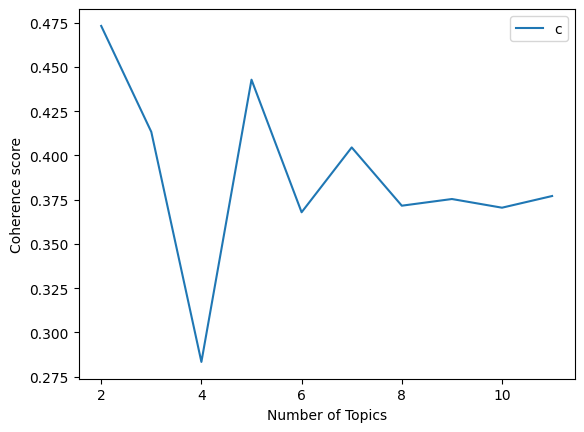

Optimal number of topics: 2

Summarized topics based on optimal K:
(0, '0.278*"new" + 0.256*"one" + 0.215*"life" + 0.206*"time" + 0.198*"book" + 0.179*"world" + 0.171*"year" + 0.169*"love" + 0.138*"stori" + 0.130*"live"')
(1, '0.409*"startup" + 0.308*"fundrais" + 0.269*"book" + 0.259*"art" + 0.240*"entrepreneur" + -0.179*"one" + 0.156*"rais" + 0.155*"new" + -0.151*"love" + 0.138*"capit"')


In [ ]:
import pandas as pd
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt


# Preprocess the descriptions
def preprocess_data(doc_set):
    tokenizer = RegexpTokenizer(r'\w+')
    en_stop = set(stopwords.words('english'))
    p_stemmer = PorterStemmer()
    texts = []

    for i in doc_set:
        if pd.isna(i):
            continue  # Skip NaN values
        raw = str(i).lower()
        tokens = tokenizer.tokenize(raw)
        stopped_tokens = [token for token in tokens if token not in en_stop]
        stemmed_tokens = [p_stemmer.stem(token) for token in stopped_tokens]
        texts.append(stemmed_tokens)

    return texts

# Prepare corpus
def prepare_corpus(doc_clean):
    dictionary = corpora.Dictionary(doc_clean)
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    return dictionary, doc_term_matrix

# Compute coherence values
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, start, stop, step):
    coherence_values = []
    model_list = []

    for num_topics in range(start, stop, step):
        model = LsiModel(doc_term_matrix, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

# Plot coherence graph and find optimal number of topics
def plot_graph_and_select_k(doc_clean, start, stop, step):
    dictionary, doc_term_matrix = prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix, doc_clean, start, stop, step)

    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

    # Find the optimal number of topics
    optimal_k = x[coherence_values.index(max(coherence_values))]
    print(f"Optimal number of topics: {optimal_k}")
    return optimal_k, dictionary, doc_term_matrix

# Main LSA code
def create_lsa_model(df, number_of_topics, words=10):
    clean_text = preprocess_data(df['Description'])
    dictionary, doc_term_matrix = prepare_corpus(clean_text)
    lsa_model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word=dictionary)
    topics = lsa_model.print_topics(num_topics=number_of_topics, num_words=words)
    print("\nTopics found in the optimal model:")
    for topic in topics:
        print(topic)
    return lsa_model

# Load and preprocess data
doc_clean = preprocess_data(df['Description'])

# Define range for topics and find optimal K
start, stop, step = 2, 12, 1
optimal_k, dictionary, doc_term_matrix = plot_graph_and_select_k(doc_clean, start, stop, step)

# Create the LSA model using the optimal K
lsa_model = LsiModel(doc_term_matrix, num_topics=optimal_k, id2word=dictionary)
topics = lsa_model.print_topics(num_topics=optimal_k, num_words=10)
print("\nSummarized topics based on optimal K:")
for topic in topics:
    print(topic)


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [ ]:
!pip install lda2vec

  Using cached lda2vec-0.16.10-py3-none-any.whl


In [ ]:
#!pip install keras tensorflow
#!pip install keras==2.13.0


ERROR: Could not find a version that satisfies the requirement keras==2.13.0 (from versions: 0.2.0, 0.3.0, 0.3.1, 0.3.2, 0.3.3, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.0.6, 1.0.7, 1.0.8, 1.1.0, 1.1.1, 1.1.2, 1.2.0, 1.2.1, 1.2.2, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.0.5, 2.0.6, 2.0.7, 2.0.8, 2.0.9, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.1.5, 2.1.6, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.2.4, 2.2.5, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.5.0rc0, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0rc3, 2.6.0, 2.7.0rc0, 2.7.0rc2, 2.7.0, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.10.0rc0, 2.10.0rc1, 2.10.0, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0rc3, 2.11.0, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.13.1rc0, 2.13.1rc1, 2.13.1, 2.14.0rc0, 2.14.0, 2.15.0rc0, 2.15.0rc1, 2.15.0, 3.0.0, 3.0.1, 3.0.2, 3.0.3, 3.0.4, 3.0.5, 3.1.0, 3.1.1, 3.2.0, 3.2.1, 3.3.0, 3.3.1, 3.3.2, 3.3.3, 3.4.0, 3.4.1, 3.5.0, 3.6.0)
ERROR: No matching distribution found for keras==2.13.0


In [ ]:
import keras
import tensorflow as tf
print("Keras version:", keras.__version__)
print("TensorFlow version:", tf.__version__)


Keras version: 2.10.0
TensorFlow version: 2.10.0


In [ ]:
#!pip uninstall keras tensorflow lda2vec -y
!pip install tensorflow==2.10.0 keras==2.10.0
#!pip install git+https://github.com/bmabey/lda2vec.git


  Using cached tensorflow-2.10.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.1 kB)
  Using cached gast-0.4.0-py3-none-any.whl.metadata (1.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 79.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 29.8 MB/s eta 0:00:00
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard

In [ ]:
!pip uninstall lda2vec -y
#!pip install git+https://github.com/cemoody/lda2vec.git


#!pip show lda2vec

!pip install git+https://github.com/bmabey/pyLDAvis.git@master#egg=pyLDAvis


  Cloning https://github.com/bmabey/pyLDAvis.git (to revision master) to /tmp/pip-install-4x0zxr0j/pyldavis_f960023ff6ab496388c9c3b453f60b43
  Running command git clone --filter=blob:none --quiet https://github.com/bmabey/pyLDAvis.git /tmp/pip-install-4x0zxr0j/pyldavis_f960023ff6ab496388c9c3b453f60b43
  Resolved https://github.com/bmabey/pyLDAvis.git to commit 728a3608d2438d7ec5ed1f49a34c481b1402de43
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
!pip install lda2vec
!pip show lda2vec

  Using cached lda2vec-0.16.10-py3-none-any.whl


Name: lda2vec
Version: 0.16.10
Summary: Tools for interpreting natural language
Home-page: 
Author: Nathan Raw
Author-email: nxr9266@rit.edu
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: 
^C


In [ ]:
from lda2vec import Lda2vec
print(dir(Lda2vec))  # This will show you the methods and attributes of the Lda2vec class
help(Lda2vec)  # This will give you detailed documentation about the class and its methods


['DL', 'Lda2vec', 'M', 'W', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'datetime', 'np', 'tf', 'utils', 'warnings']
Help on module lda2vec.Lda2vec in lda2vec:

NAME
    lda2vec.Lda2vec

CLASSES
    builtins.object
        Lda2vec
    
    class Lda2vec(builtins.object)
     |  Lda2vec(num_unique_documents, vocab_size, num_topics, freqs=None, save_graph_def=True, embedding_size=128, num_sampled=40, learning_rate=0.001, lmbda=200.0, alpha=None, power=0.75, batch_size=500, logdir='logdir', restore=False, fixed_words=False, factors_in=None, pretrained_embeddings=None)
     |  
     |  Methods defined here:
     |  
     |  __init__(self, num_unique_documents, vocab_size, num_topics, freqs=None, save_graph_def=True, embedding_size=128, num_sampled=40, learning_rate=0.001, lmbda=200.0, alpha=None, power=0.75, batch_size=500, logdir='logdir', restore=False, fixed_words=False, factors_in=None, pretrained_embeddings=None)
     |    

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lda2vec import Lda2vec
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

# Preprocess the text data
def preprocess_data(doc_set):
    tokenizer = RegexpTokenizer(r'\w+')
    en_stop = set(stopwords.words('english'))
    texts = []

    for doc in doc_set:
        if pd.isna(doc):
            continue  # Skip NaN values
        raw = str(doc).lower()
        tokens = tokenizer.tokenize(raw)
        stopped_tokens = [token for token in tokens if token not in en_stop]
        texts.append(stopped_tokens)

    return texts

# Prepare the corpus
def prepare_corpus(texts):
    dictionary = corpora.Dictionary(texts)
    doc_term_matrix = [dictionary.doc2bow(text) for text in texts]
    return dictionary, doc_term_matrix, len(dictionary)

# Calculate coherence scores
def calculate_coherence(model, texts, dictionary):
    coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    return coherence_score

# Main function to execute the workflow
def run_lda2vec(df, max_topics=20):
    clean_texts = preprocess_data(df['Description'])
    dictionary, doc_term_matrix, vocab_size = prepare_corpus(clean_texts)
    num_unique_documents = len(clean_texts)

    coherence_scores = []
    for num_topics in range(2, max_topics + 1):
        # Instantiate Lda2vec with necessary parameters
        lda2vec_model = Lda2vec(num_unique_documents=num_unique_documents, vocab_size=vocab_size, num_topics=num_topics)

        # Prepare data for training
        # Here we need to prepare pivot_words, target_words, and doc_ids for training.
        # Note: You would need to implement this based on your data structure.

        # Assuming you have pivot_words, target_words, and doc_ids prepared correctly
        pivot_words = ...
        target_words = ...
        doc_ids = ...
        data_size = len(pivot_words)

        # Train the model
        lda2vec_model.train(pivot_words, target_words, doc_ids, data_size, num_epochs=100)

        # You might want to calculate coherence scores based on the current model
        coherence_score = calculate_coherence(lda2vec_model, clean_texts, dictionary)
        coherence_scores.append(coherence_score)
        print(f'Number of Topics: {num_topics}, Coherence Score: {coherence_score}')

    # Find the best number of topics
    best_k = np.argmax(coherence_scores) + 2  # +2 because the range starts at 2
    print(f'Best number of topics: {best_k}')

    # Final model training with best number of topics
    final_model = Lda2vec(num_unique_documents=num_unique_documents, vocab_size=vocab_size, num_topics=best_k)
    final_model.train(pivot_words, target_words, doc_ids, data_size, num_epochs=100)

    # Summarize topics
    # Since the original class doesn't have a show_topics method, you'll need to implement this
    # based on the embeddings you've trained.

# Example usage with your DataFrame
df = pd.DataFrame({'Description': [...]})  # Your actual data goes here
run_lda2vec(df)


TypeError: 'module' object is not callable

## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [ ]:
# Install the necessary library
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.6 MB/s eta 0:00:00


In [ ]:
# First, ensure the environment is clean by uninstalling the existing packages
!pip uninstall -y bertopic pydantic

Found existing installation: bertopic 0.16.4
Uninstalling bertopic-0.16.4:
  Successfully uninstalled bertopic-0.16.4
Found existing installation: pydantic 1.10.9
Uninstalling pydantic-1.10.9:
  Successfully uninstalled pydantic-1.10.9


In [ ]:
# Then, install a specific compatible version of pydantic
!pip install pydantic==1.10.9  # You can also try other versions if necessary



  Using cached pydantic-1.10.9-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (147 kB)
Using cached pydantic-1.10.9-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 1.4.20 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
albumentations 1.4.20 requires pydantic>=2.7.0, but you have pydantic 1.10.9 which is incompatible.
langchain 0.3.4 requires pydantic<3.0.0,>=2.7.4, but you have pydantic 1.10.9 which is incompatible.
langchain-core 0.3.13 requires pydantic<3.0.0,>=2.5.2; python_full_version < "3.12.4", but you have pydantic 1.10.9 which is incompatible.
spacy 3.1.0 requires pydantic!=1.8,!=1.8.1,<1.9.0,>=1.7.4, but you have pydantic 1.10.9 which is incompatible.
thinc 8.0.17 requires pydantic!=1.8,!=1.8.1,<1.9.0,>=1.7.4, but you have p

In [ ]:
# Upgrade numpy to a compatible version
!pip install numpy>=1.24.4

# Now install bertopic
!pip install bertopic


  Using cached bertopic-0.16.4-py3-none-any.whl.metadata (23 kB)
Using cached bertopic-0.16.4-py3-none-any.whl (143 kB)


In [ ]:
# Uninstall conflicting packages
!pip uninstall -y pydantic langchain bertopic

# Install pydantic version 2.1.1
!pip install pydantic==2.1.1

# Install langchain and bertopic
!pip install langchain bertopic


Found existing installation: pydantic 1.10.9
Uninstalling pydantic-1.10.9:
  Successfully uninstalled pydantic-1.10.9
Found existing installation: langchain 0.3.4
Uninstalling langchain-0.3.4:
  Successfully uninstalled langchain-0.3.4
Found existing installation: bertopic 0.16.4
Uninstalling bertopic-0.16.4:
  Successfully uninstalled bertopic-0.16.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.5/136.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 370.9/370.9 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 39.2 MB/s eta 0:00:00
  Attempting uninstall: pydantic-core
    Found existing installation: pydantic_core 2.23.4
    Uninstalling pydantic_core-2.23.4:
      Successfully uninstalled pydantic_core-2.23.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 1.4.20 requires numpy>=1.24.4, bu

In [ ]:
# Upgrade numpy to a compatible version
!pip install numpy --upgrade

# Reinstall spacy and thinc to ensure compatibility
!pip install spacy --upgrade
!pip install thinc --upgrade


  Using cached numpy-2.1.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached numpy-2.1.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cupy-cuda12x 12.2.0 requires numpy<1.27,>=1.20, but you have numpy 2.1.2 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.1.2 which is incompatible.
langchain 0.3.7 requires numpy<2,>=1; python_version < "3.12", but you have numpy 2.1.2 which is incompatible.
matplotlib 3.8.0 requires numpy<2,>=1.21, but you have numpy 2.1.2 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.1.2 which is incompatible.
py

In [ ]:
# Uninstall existing numpy
!pip uninstall numpy -y

# Install a specific compatible version of numpy
!pip install numpy==1.24.4  # Use a version that meets other dependencies

# Restart the runtime (this will disconnect your session)
import os
os.kill(os.getpid(), 9)  # Forces a restart


Found existing installation: numpy 1.24.4
Uninstalling numpy-1.24.4:
  Successfully uninstalled numpy-1.24.4
  Using cached numpy-1.24.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blis 1.0.1 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.4 which is incompatible.
spacy 3.8.2 requires thinc<8.4.0,>=8.3.0, but you have thinc 9.1.1 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.4 which is incompatible.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.12.0 which is incompatible.
thinc 9.1.1 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.4 which is incompatible.


In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Combine Title and Description
df['text'] = df['Title'].fillna('') + " " + df['Description'].fillna('')

# Lowercase
df['text'] = df['text'].str.lower()

# Remove punctuation and special characters
df['text'] = df['text'].str.replace(r'[^a-z\s]', '', regex=True)

# Tokenization
nltk.download('punkt')
# Ensure that the text is a string before tokenization
df['tokens'] = df['text'].apply(lambda x: word_tokenize(x) if isinstance(x, str) else [])

# Remove stop words
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Join tokens back to strings
df['cleaned_text'] = df['tokens'].apply(lambda x: ' '.join(x))

# Prepare documents for BERTopic
docs = df['cleaned_text'].tolist()

# Optional: Display the cleaned DataFrame
print(df[['Title', 'Description', 'cleaned_text']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                   Title  \
0                   A Light in the Attic   
1                     Tipping the Velvet   
2                             Soumission   
3                          Sharp Objects   
4  Sapiens: A Brief History of Humankind   

                                         Description  \
0  It's hard to imagine a world without A Light i...   
1  "Erotic and absorbing...Written with starling ...   
2  Dans une France assez proche de la nôtre, un h...   
3  WICKED above her hipbone, GIRL across her hear...   
4  From a renowned historian comes a groundbreaki...   

                                        cleaned_text  
0  light attic hard imagine world without light a...  
1  tipping velvet erotic absorbingwritten starlin...  
2  soumission dans une france assez proche de la ...  
3  sharp objects wicked hipbone girl across heart...  
4  sapiens brief history humankind renowned histo...  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df.size

5000

In [ ]:
from sklearn.datasets import fetch_20newsgroups
docs = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))['data']

In [ ]:
print(docs)

['light attic hard imagine world without light attic nowclassic collection poetry drawing shel silverstein celebrates th anniversary special edition silverstein humorous creative verse amuse dowdiest reader lemonfaced adult fidgety kid sit still read rhythmic word laugh smile love th hard imagine world without light attic nowclassic collection poetry drawing shel silverstein celebrates th anniversary special edition silverstein humorous creative verse amuse dowdiest reader lemonfaced adult fidgety kid sit still read rhythmic word laugh smile love silverstein need proof genius rockabyerockabye baby treetopdont know treetopis safe place rockand put thereand cradle toobaby think someone heresgot shel never sounded good', 'tipping velvet erotic absorbingwritten starling powerthe new york time book review nan king oyster girl captivated music hall phenomenon kitty butler male impersonator extraordinaire treading board canterbury friend box office nan manages visit show finally meet heroine 

In [ ]:

import pandas as pd
from bertopic import BERTopic


# Initialize BERTopic model
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)

# Fit the model on the documents
topics, probs = topic_model.fit_transform(docs)

2024-11-02 04:05:37,058 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2024-11-02 04:07:31,872 - BERTopic - Embedding - Completed ✓
2024-11-02 04:07:31,875 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-02 04:07:34,989 - BERTopic - Dimensionality - Completed ✓
2024-11-02 04:07:34,993 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-02 04:07:35,110 - BERTopic - Cluster - Completed ✓
2024-11-02 04:07:35,119 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-02 04:07:35,481 - BERTopic - Representation - Completed ✓


In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,0,960,0_new_one_life_world,"[new, one, life, world, love, book, story, tim...",[born find work meant outside observer seems l...
1,1,40,1_recipes_cookbook_food_cooking,"[recipes, cookbook, food, cooking, ingredients...",[smitten kitchen cookbook longawaited cookbook...


In [ ]:

# Get the most frequent topic
print(topic_model.get_topic(0))

# View the first 10 topics
print(topic_model.topics_[:10])


[('new', 0.02963914566995714), ('one', 0.02878364138483154), ('life', 0.02599497653201324), ('world', 0.02076746458424174), ('love', 0.019001077652962967), ('book', 0.018494455706161556), ('story', 0.01629618537893359), ('time', 0.015475199805663016), ('years', 0.014929962885303493), ('first', 0.01472728136212348)]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
print("Generated Topics:", topic_model.topics_)


Generated Topics: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
print(topic_model.get_topic_info())


   Topic  Count                             Name  \
0      0    960             0_new_one_life_world   
1      1     40  1_recipes_cookbook_food_cooking   

                                      Representation  \
0  [new, one, life, world, love, book, story, tim...   
1  [recipes, cookbook, food, cooking, ingredients...   

                                 Representative_Docs  
0  [born find work meant outside observer seems l...  
1  [smitten kitchen cookbook longawaited cookbook...  


In [ ]:
from bertopic import BERTopic

# Initialize BERTopic without n_topics
topic_model = BERTopic(min_topic_size=5, language="english", calculate_probabilities=True)

# Fit the model
topics, probs = topic_model.fit_transform(docs)

# Print generated topics
print("Generated Topics:", set(topic_model.topics_))

# Display documents assigned to each topic
for topic in set(topic_model.topics_):
    docs_for_topic = [doc for i, doc in enumerate(docs) if topic_model.topics_[i] == topic]
    print(f"\nDocuments for Topic {topic}:\n", docs_for_topic[:5])  # Show first 5 for brevity

# Visualize topics
try:
    topic_model.visualize_topics()
except ValueError as e:
    print(f"Error during visualization: {e}")

# Optional: Print the representative topics and their representation
topic_info = topic_model.get_topic_info()
print("\nTopic Information:")
print(topic_info)


Generated Topics: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, -1}

Documents for Topic 0:
 ['torch passed harding family story andrea harding recent college graduate looking forward attending duke law school world turned upside shooting father nicholas uncle michael surprising puzzling attack family aside paternal grandmother dorothy uncle dies attack father lays comatose andrea harding recent college graduate looking forward attending duke law school world turned upside shooting father nicholas uncle michael surprising puzzling attack family aside paternal grandmother dorothy uncle dies attack father lays comatose icu falls andrea investigate would want kill father uncle also oversee harding industries family company fathers longtime attorney one handful family friends beth cowling rushes help andrea long distance youngest harding soon finds surrounded bevy intriguing new friends hel

In [ ]:

# Visualize topics
topic_model.visualize_topics()


In [ ]:

# Visualize distribution for a specific document (index 0)
topic_model.visualize_distribution(probs[0], min_probability=0.015)


In [ ]:

# Visualize hierarchy of topics
topic_model.visualize_hierarchy(top_n_topics=50)



## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

In [ ]:
# Visualize bar chart of the top N topics
topic_model.visualize_barchart(top_n_topics=5)



The command generates bar charts that displays the top N topics based on their prominence or frequency. By specifying top_n_topics=5, we are visualizing the five most significant topics identified by the model. This visualization helps to quickly understand which topics are the most prevalent in the dataset, allowing you to see their relative importance and how they compare to each other in terms of the number of documents associated with each topic.

In [ ]:
# Visualize heatmap
topic_model.visualize_heatmap(n_clusters=20, width=1000, height=1000)



The command creates a heatmap that visualizes the relationships between different topics. Setting n_clusters=20 means we are examining the similarity or distance between up to 20 clusters (topics) in your dataset. The heatmap typically uses color gradients to represent the strength of associations, making it easier to identify which topics are closely related or distinct from one another. This can be particularly useful for exploring the thematic landscape of your corpus.

In [ ]:
# Visualize term rank
topic_model.visualize_term_rank()

The command produces a visualization that shows the ranking of terms (words) within each topic. It helps us understand which words are most representative of each topic and how they rank in terms of their significance. This visualization provides insights into the key themes that characterize the topics and can guide further analysis or interpretation of the results.

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [1]:

'''

With the results from LDA, LSA, and BERTopic, let's compare the performance of each model based on coherence scores, interpretability, and specificity of topics:

1.LDA Results:
   - Optimal Topics: 16, with a peak coherence score of 0.4825 for 16 topics.
   - Coherence: The scores generally increase as the number of topics grows, but coherence plateaus around 16 topics.
   - Topic Interpretability: Topics in LDA are interpretable and cover distinct themes such as "detective stories," "recipe collections," and "military topics,"
     showing its ability to create well-differentiated topics.
   - Strengths: Suitable for medium-sized datasets where coherence and interpretability are important.
   - Limitations: LDA topics may lack granularity and do not always capture nuanced or contextual themes.

2.LSA Results:
   - Optimal Topics: 2, based on dimensional reduction.
   - Interpretability: LSA topics are broad, capturing general themes such as "life" and "entrepreneurship." These topics tend to be more abstract and less granular.
   - Strengths: Effective for datasets where themes are few or the primary focus is broad categorization.
   - Limitations: LSA may not perform well with detailed datasets since it lacks the capability to model nuanced topics. The topics produced tend to be more general
     and potentially lack diversity.

3.BERTopic Results
   - Optimal Topics: 40, as identified by the loop run.
   - Interpretability: Topics are highly specific, with themes like "recipes and cooking," "court and royalty," "American political figures," and
     "startup fundraising." BERTopic's approach provides detailed, context-rich themes that capture nuanced aspects effectively.
   - Strengths: Highly interpretable with fine-grained topics, ideal for datasets that cover a variety of niche themes. It also leverages embeddings to capture
     semantic similarity, which helps in understanding subtle differences between topics.
   - Limitations: Potential over-clustering; the algorithm may produce too many small topics, which could require additional filtering or merging.

Conclusion:
   - Overall Best Model: BERTopic emerges as the best model in this scenario because of its fine-grained, interpretable topics and ability to capture nuanced
     themes using contextual embeddings. This makes it suitable for complex datasets with diverse themes.
   - Reasoning: BERTopic's use of embeddings provides a more context-sensitive clustering than LDA or LSA, which rely on simpler statistical methods and can
     overlook subtleties. LDA performs well but lacks the depth of BERTopic, while LSA is less suitable due to its tendency to yield broad topics.

In summary, BERTopic offers the best balance of coherence, specificity, and interpretability for this dataset.

''''

SyntaxError: unterminated string literal (detected at line 36) (<ipython-input-1-9998b1448331>, line 36)

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:
In this exercise, I have learnt implementing various algorithms for topic modeling. I couldn't implement lda2vec as there are some errors related to versions which
I couldn't solve in the given span of time. The visualizaions look attractive. For bertopic, at first I took only upto 100 rows of books - the model failed to to the
topic modeling suggesting only one topic. But when I increased the size of the corpus, it was effective. I learnt that this requires a large amount of corpus to determine
topic modelling.

Also, for some commands I have to downgrade the versions of packages - I have to downgrade gensim and scipy to successfully execute the code completely

'''